University of Michigan - ROB 101 Computational Linear Algebra

# Homework 9.  Optimization
### See our Canvas Page for the Due Date and Time!

#### Purpose: Learn how to optimize functions using Julia.
- Skills
    - Computing a Gradient of a function
    - Computing the Hessian of a function
    - Finding local minima and maxima of functions
- Knowledge
    - Using the Symbolics.jl package to do symbolic math for you. All those messy derivatives
      in Calculus that a person learns to due by hand, a computer can also do, 
      and without mistakes. 
    - Understand the significance of minima and maxima in different contexts
 
    
#### Task:
Complete and run the cells below as directed.

### Problem 1:  Calculate the gradient of g(x, y, z) at (-1, -1.1, 1) using symmetric differences.
Use a step-size h of 0.001.  Your answer should be a 3d vector.
## $$ g(x, y, z) = xye^z - 14yz +sin(x)cos(y) -e^{tan(z/y)}$$

An example of how to use symmetric difference method to find the gradient at point (-1.0, -1.1, 1.0) in the x-direction is as follows: $$ \frac{\partial g(x, y, z)} {\partial x} = \frac {g(x+h, y, z) - g(x-h, y, z)}{2h} $$
You will need to find the gradient in all three directions (x, y, and z).

In [ ]:
using LinearAlgebra

In [ ]:
#g is declared for you.  Use step size h, and starting point (x0, y0, z0)
g(x, y, z) = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))
h = 0.001
(x0, y0, z0) = (-1, -1.1, 1)

#first, calculate dg/dx 
# dgdx = ??

#calculate dg/dy 
# dgdy = ??

#calculate dg/dz
# dgdz = ??

#Create the gradient vector, and save it as gradVect
# gradVect = ??

# A check you can perform on your own
# norm(gradVect) #should equal approximately 25.594

### Problem 2:  Solving for the gradient analytically with Symbolics.jl
**The Trick:** We will be using a super-cool Julia Package called Symbolics.jl which provides a lot of symbolic math functions. The functions we are particularly interested in are the ones for  differentiation.

These functions can calculate analytical forms for math expressions that would frighten most humans! But not you, a denizen of ROB 101. You know that Julia is your friend when you are in need! [Truth in advertising: MATLAB and Python do symbolic math too!]

#### Can you imagine how helpful these packages can be for doing calculus at scale for real engineering problems? Or, even for checking your answers in Vector Calculus, MATH 215? We use tools like this for computing models of robots. 




In [ ]:
# load the Symbolics.jl package
using Symbolics

# declare your variables
@variables x y z

# Conjure a gnarly expression
f = exp(x*y*z)+sin(x/y)

# Finds the partial derivative with respect to z
# you can do the same with x and y. See below
df_dz = Symbolics.derivative(f, z) 

#### Symbolics.derivative(f, x)  will return an expression representing the gradient of expression $f$ in the x direction. You can replace $x$ with any of the variables $y$ or $z$ to get gradients in their directions.

$$ f = xye^z - 14yz + sin(x)cos(x) - e^{tan(\frac{z}{y})}$$


Using Symbolics, find expressions for df/dx, df/dy, and df/dz. **Use the inidcated naming conventions.**

In [ ]:
# Use Symbolics to find an expression for df/dx.
# Store your expression in variable df_dx
# f is declared here for you

f = x*y*exp(z) - 14y*z + sin(x)*cos(y) - exp((tan(z/y)))

# df_dx = ??

In [ ]:
#use Symbolics to find an expression for df/dy
# Store your expression in variable df_dy

# df_dy = ??

In [ ]:
# Use Symbolics to find an expression for df/dz
# Store your expression in variable df_dz

# df_dz = ??

## Evaluating the formulas at specific points to create real numbers or real arrays (vectors or matrices)

In [ ]:
# We can now evaluate our symbolic expressions for the derivatives
# of f at real-numbered values.
#
# We supply a dictionary to the substitute function, where the dictionary 
# maps the variables x,y,z to real values. The substitute function in turn 
# evaluates our derivative expressions at those values.

# We illustrate each step of the process

D = [df_dx df_dy df_dz]
println("Symbolic Expression")
display(D)
#
println("Evaluate the symbolic expression at specific values")
∂f = substitute.(D, (Dict(x=>-1, y=>-1.1, z=>1),)) # note the dot "." after substitute
@show typeof(∂f)
display(∂f)
# Here is the expected answer for ∂f, once values are substituted
#
# [-2.74503  -16.862  19.0569]
#
#
println("We convert ∂f from a row vector of TYPE Num to a row vector of TYPE Float64")
∂f = map(x -> Float64(x.val), ∂f)
display(∂f)
# Some rounding occurs. Don't sweat it.

In [ ]:
# Using the Symbolics.derivative, substitute, and type conversion functions, illustrated
# above, write a function that takes in a symbolic expression F and 
# real values xval, yval, zval and returns a real-valued row vector 
# that contains derivatives of F with respect to x,y,z

# Call your function Grad(F, xval, yval, zval)

# Note that we have already defined symbolic variables x, y, z
# so you can use them in your function, just like in the 
# examples above


function Grad(F, xval, yval, zval) 
    # YOUR CODE HERE
    # Df should be a row vector of real numbers. 
    return Df
end


In [ ]:
# Friendly check: are you returning a real vector or something else?
gradcheck = Grad(f, 0.1, -1.1, -0.3)
display(gradcheck)

if typeof(gradcheck) == Matrix{Num}
    println("You forgot to include Df = map(x -> Float64(x.val), Df) in your Grad function")
elseif typeof(gradcheck) == Matrix{Float64}
    println("Looks like a real vector or matrix. Bravo!")
else
    printlin("Unsure what the error is, but you need to fix it before proceeding!")
end

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 

gradcheck = Grad(f, 0.1, -1.1, -0.3)
display(gradcheck)

is_it_correct_check1 = isapprox(gradcheck, [-0.3635700125774831 4.009449409253971 16.615060520261437], atol=1e-4) ? "Yes" : "No"  

@show is_it_correct_check1;

In [ ]:
#autograder cell
#
grad_at_1 = Grad(f, -1, -1.1, 1)

@assert(isapprox(gradVect, grad_at_1, atol = 1E-4))

### Example:  The Hessian
A reminder that the Hessian is the Jacobian of the transpose of the gradient of a function $f$: is that a mouthful or what? Why do we care? Extrema of a function (that is, max, min, and something else called a saddle point) "live" in the zero set of $ \nabla f(x)$. Hence, if $x^\ast$ is a local minimun of $f$, it satisfies $\nabla f(x^\ast)=0$, which means it is a root of $\nabla f(x)=0$. We can therefore apply Newton-Raphson to the gradient function in order to find its roots, and hence find local minima, for example. 

$$\begin{equation}
    \label{eq:Hessian}
    \nabla^2 f(x) := \frac{\partial}{\partial x} \left[ \nabla f(x) \right]^\top
\end{equation}$$
Where $\nabla^2 f(x) $ is the Hessian of $f$ at point $x$.

The following function uses a symmetric differences approximation to compute the Hessian of f at x0.

In [ ]:
# run me, don't change me. I will compute gradients and Hessians for you. 
# I am a workhorse of a function!
#
function gradHess(f,x0) 
    n=size(x0,1)
    H=zeros(n,n)
    grad1=zeros(1,n)
    Id=diagm(0=>fill(1., size(H,1))) # Another way to make an identity matrix
    delta=0.01
    h=delta
    for i=1:n
        grad1[i]=(f(x0+ h*Id[:,i]) -f(x0 -  h*Id[:,i]))[1]/(2*h)
        for j=1:n
            H[i,j]=(f(x0+ h*Id[:,i] + delta*Id[:,j])-  f(x0+  h*Id[:,i]-delta*Id[:,j]) - f(x0-  h*Id[:,i] + delta*Id[:,j])+ f(x0- h*Id[:,i]-delta*Id[:,j]))[1]/(4*h*delta)
        end
    end
    return  grad1, H
end

In [ ]:
# run me, don't change me. I am creating a super complicated function to show you
# how efficiently gradHess can compute the gradient and the Hessian. I wish you luck
# doing this by hand! Go for it, make my day!  
#
#f and x0 are declared to be random matrices/vectors of size 20 
using LinearAlgebra
using Random
Random.seed!(4321);
n=20;
A2=rand(n,n);
A4=rand(n,n);
f2(x)= x'*A2*x + x'*x*x'*A4*x;
x0=rand(n,1)

#Here is in example using the function gradHess  
(gradN, Hess) =gradHess(f2, x0)
display( gradN )
Hess

### Problem 3:  Use `gradHess` to minimize a function g(x), where $x\in \mathbb{R}^{20}$
Please re-read Section 11.6 in our textbook. A few key points are summarized here, but for the full context, please see the book! We have $g:\mathbb{R}^n \to \mathbb{R}$. 

We seek

$$x^\ast = {\rm arg~min}_{x\in \mathbb{R}^n} g(x) $$

We know that $x^\ast$ is a root of $\nabla g(x)$. Because the gradient is a row vector, we take its transpose and turn it into a column vector so that
$$ \nabla g^\top: \mathbb{R}^n \to \mathbb{R}^n.$$

We know how to find roots of vector-valued functions: we must apply Newton-Raphson to the function. To do that, we need the Jacobian of $\nabla g^\top(x)$, which is the Hessian. Yes, $\nabla^2g(x):= \frac{\partial }{\partial x }\nabla g^\top(x).$

Lucky you, we have provided free of charge the awesome function:

**(grad, Hess) = gradHess(g, x0)**

which computes both the gradient and the Hessian. You'll have to transpose the gradient yourself! We think you can handle it. Your mission therefore, is to implement the algorithm below on a gnarly function $g:\mathbb{R}^n \to \mathbb{R}$ and find its minimum to a tolerance of ${\rm tol}=10^{-6}$!
### Newton-Raphson applied to the transpose of the gradient so that a local minimum can be found: You must put this in some kind of loop(For or While), just as you did in HW for the Bisection Algorithm. 
### In a loop, solve the top equation for $\Delta x_{k} $ and then use it to update the second equation.

### $$
\nabla^2 g(x_k)~ \Delta x_{k} = - \left[\nabla g(x_k) \right]^\top
$$ 
### $$
~~~~~~~~~~~x_{k+1}= x_k + \Delta x_{k}
$$
### Exit the loop when $||\nabla g(x_k)^\top|| < {\rm tol} $. g(x) and an initial xk for k=0 are declared for you.  You may find that Chapter 12.5 of the textbook is helpful here.

### Remark: While the equation $$\nabla^2 g(x_k)~ \Delta x_{k} = - \left[\nabla g(x_k) \right]^\top
$$ may look intimidating, it is just another linear equation $Ax = b$ where $A \leftrightarrow \nabla^2 g(x_k)$, a square matrix, $x \leftrightarrow \Delta x_{k}$, a column vector of unknowns,  and $b \leftrightarrow  - \left[\nabla g(x_k) \right]^\top$ is a column vector in the right hand side of the equation. 

### Hence, computing $\Delta x_{k}$ is cake for you by now. 

In [ ]:
# run me, don't change me.
# this cell declares g(x), a function that depends on 20 variables, and xk for k=0, 
# which you are to use as your starting point
n=20 
Random.seed!(4321); 
A2=rand(n,n) 
A4=rand(n,n) 
g(x)= -x'*A2'*A2*x + x'*x*x'*A4'*A4*x
k=0
xk=100*rand(n,1)-200*rand(n,1)

# Below we show how to write a ``safe`` While Loop, meaning one that will terminate in a finite number of loops. You just need to include a counter that sets an upper bound on the number of loops. In the beginning, be cautious and set kmax = 100 or something fairly small. Once things seems to be working, then you can up kmax to 1e5.


# If you turn in a notebook with a While Loop that does not terminate, we cannot grade the notebook. This is not a typo. We did not mean that we cannot grade that cell. The autograder will time out on the notebook and will not return a grade for any of the cells.


## If you see an [*] in a cell number for a long time, that means you have entered an infinite loop. It does not mean that Julia is just running slow! Instead, it means that you messed up. Don't worry, it happens to all of us. However, 

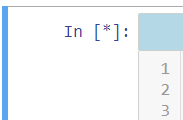

## you must manually terminate the cell by stopping your kernel. One way to do that is to hit the big black square next to the Run button

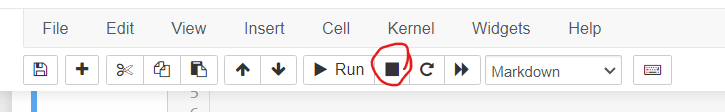

## Next, you will probably need to restart your kernel

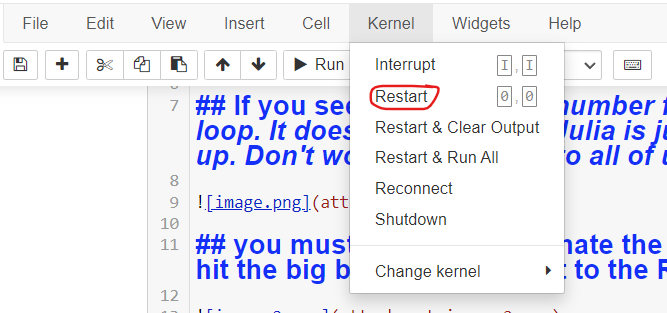


In [ ]:
# Example of how to make sure a while loop does not run forever

k=0; kmax = 1e2
tol = 1e-6 # in case it got changed by a student
myConvergenceCondition = 10
while (myConvergenceCondition > tol) && (k<kmax)
    myConvergenceCondition = myConvergenceCondition/1.1
    k=k+1
end
if (k>=kmax)&&(myConvergenceCondition > tol)
    println("The While Loop terminated prematurely with k = $k = kmax and myConvergenceCondition = $myConvergenceCondition ")
else
    println("The While Loop terminated with k = $k < kmax = $kmax and myConvergenceCondition = $myConvergenceCondition ")
end


In [ ]:
#Use this cell to find the minimum
#Save the value of the minimizer, x*, in a variable called x_star
#Save the minimum value of g in a variable called g_min
#Use the gradHess function that we provided to calculate the Hessian
#Don't forget the transpose on grad_g.
#
tol = 1e-6 # reminder 

# YOUR CODE HERE

@show g_min =  g(xk)[1]
xk

## Optional Read: How to test the code you wrote to solve the above problem

### Build a function where you know the minimum value and where the minimum occurs

### For example, myTestFun(x) = (x[1]-4.0)^2 + (x[2]-3.0)^4 + 1.0

### The minimum value of 1.0 is achieved for x = [4.0; 3.0]

### What's your call: are you going to roll the dice or check your work? 

In [ ]:
myTestFun(x) = (x[1]-4.0)^2 + (x[2]-3.0)^4 + 1.0

# While you are not obliged to check your code in ROB 101, as a professional engineer, 
# you will be expected to check it and to answer for any errors.

# If you check your code, do NOT forget to choose an
# an inititial value for xk

# YOUR CODE HERE

## Surprise, that's it! We want you to save some energy for Project 3. 